In [1]:
import cv2
import sys
import pytesseract


In [33]:
from scipy import ndimage

In [2]:
import matplotlib.pyplot as plt

In [3]:
img=cv2.imread('Indian-Number-Plate-Recognition-System-master/testData/car.jpg')

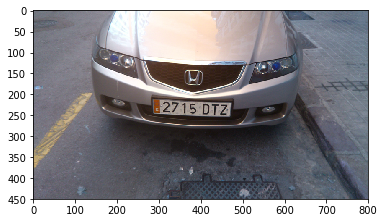

In [4]:
plt.imshow(img)

In [4]:
!ls

 2017-IWT4S-CarsReId_LP-dataset.zip
 2017-IWT4S-HDR_LP-dataset
 2017-IWT4S-HDR_LP-dataset.zip
'A Novel Approach for Vehicle License Plate .pdf'
'Automatic Vehicle Number Plate.pdf'
'Car Number Plate Detection Sample.ipynb'
'Car Number Plate D &R.pdf'
'Car Number Rec & Detec.pdf'
'Faster R-CNN.pdf'
 I00000.png
 I00001.png
 IJETT-V10P322.pdf
'Image Segmentation using K-means clustering and.pdf'
 Indian-Number-Plate-Recognition-System-master
 Indian-Number-Plate-Recognition-System-master.zip
'Modern Car Number Plate.pdf'
'Number Plate Faster RCNN.pdf'
'Otso Vs Kmeans.pdf'
 Untitled1.ipynb
 Untitled.ipynb


In [5]:
gaussblur = cv2.GaussianBlur(img,(5,5),0)

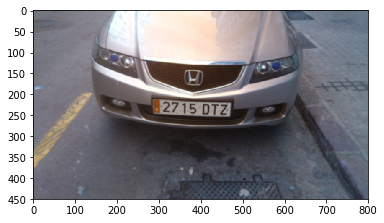

In [6]:
plt.imshow(gaussblur)

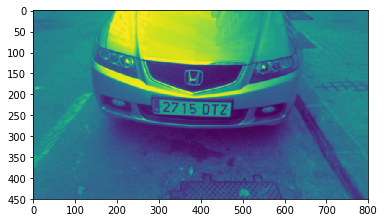

In [10]:
img_gray = cv2.cvtColor(gaussblur,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [12]:
import numpy as np

In [13]:
hist,bins = np.histogram(img_gray.flatten(),256,[0,256])

In [15]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

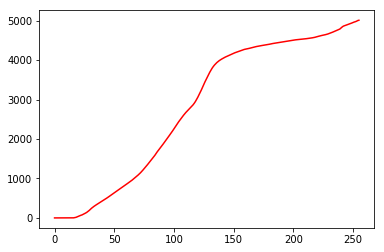

In [21]:
cdf_normalized = cdf * hist.max()/ cdf.max()


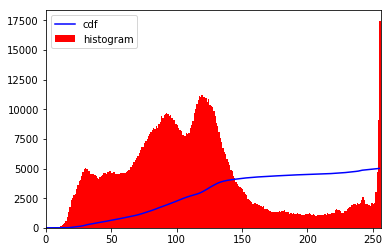

In [27]:
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.plot(cdf_normalized, color = 'b')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlim([0,256])
plt.show()

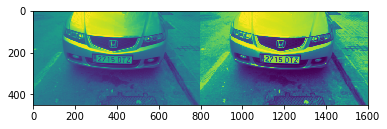

In [28]:
equ = cv2.equalizeHist(img_gray)
res = np.hstack((img_gray,equ))
plt.imshow(res)


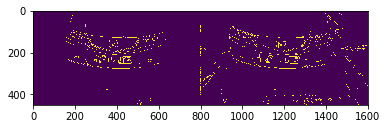

In [30]:
edges = cv2.Canny(res,100,200)
plt.imshow(edges)

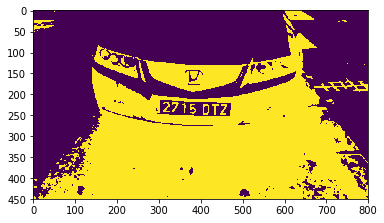

In [32]:
ret, thresh = cv2.threshold(equ,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)

In [ ]:
mask[newmask == 0] = 0

In [36]:
imgf=ndimage.gaussian_filter(img, blur_radius)
plt.imshow(imgf)

NameError: name 'blur_radius' is not defined

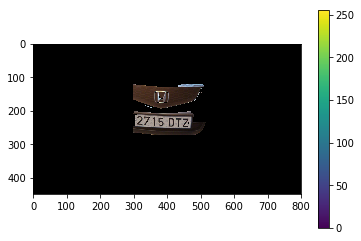

(<matplotlib.image.AxesImage at 0x7f9be7b36550>,
 None)

In [62]:
rect = (300,79,250,200)
mask = np.zeros(thresh.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
imglo = img*mask2[:,:,np.newaxis]
plt.imshow(imglo),plt.colorbar(),plt.show()

In [ ]:
rect = (30,50,450,290)